In [1]:
# EacyOCR 사용하기
from easyocr import Reader
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [2]:
languages_list = ['en', 'pt']
print(languages_list)

['en', 'pt']


In [3]:
gpu = True

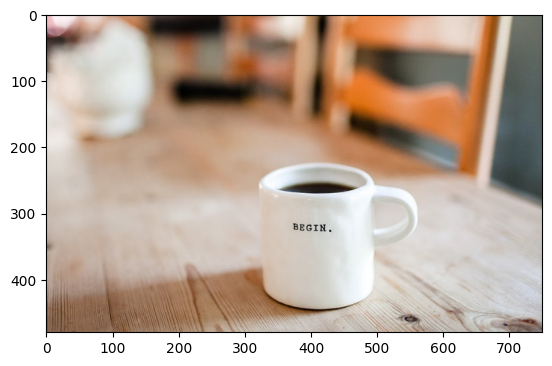

In [4]:
img = cv2.imread('./OCR_with_Python/Images/cup.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
original = img.copy()

In [6]:
reader = Reader(languages_list, gpu)
result = reader.readtext(img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[373, 313], [435, 313], [435, 331], [373, 331]],
  'BEGIN .',
  0.6624375575121239)]

In [7]:
# Writing the result on the image
font = './OCR_with_Python/Fonts/calibri.ttf'

In [8]:
def write_text(img, text, x, y, font, color=(50, 50, 255), font_size=22):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font, fill=color)
    img = np.array(img_pil)
    return img

In [9]:
# Bouding Box
#   - lt: left top
#   - rt: right top
#   - br: bottom right
#   - bl: bottom left
def box_coordinates(box):
    (lt, rt, br, bl) = box
    lt = (int(lt[0]), int(lt[1]))
    rt = (int(rt[0]), int(rt[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    return lt, rt, br, bl

def draw_img(img, lt, br, color=(200, 255, 0), thickness=2):
    cv2.rectangle(img, lt, br, color, thickness)
    return img

In [10]:
result[0][0]

[[373, 313], [435, 313], [435, 331], [373, 331]]

In [11]:
box_coordinates(result[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [12]:
img = original.copy()

for (box, text, probability) in result:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)

[[373, 313], [435, 313], [435, 331], [373, 331]] BEGIN . 0.6624375575121239


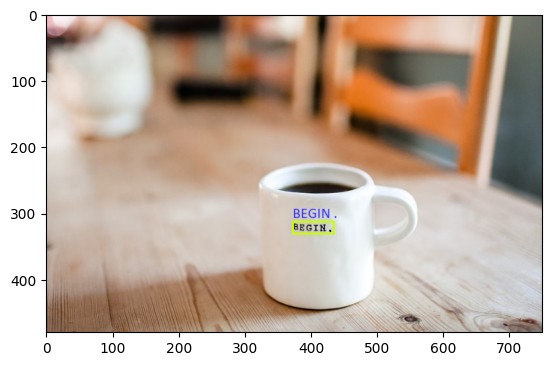

In [13]:
plt.imshow(img)

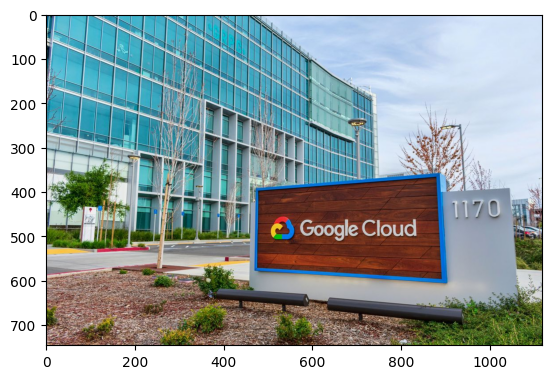

In [14]:
google_img = cv2.imread('./OCR_with_Python/Images/google-cloud.jpg')
google_img = cv2.cvtColor(google_img, cv2.COLOR_BGR2RGB)
plt.imshow(google_img)

In [15]:
reader = Reader(languages_list, gpu)
results = reader.readtext(google_img)
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[910, 412], [1034, 412], [1034, 468], [910, 468]],
  '1170',
  0.9022491574287415),
 ([[566, 454], [845, 454], [845, 520], [566, 520]],
  'Google Cloud',
  0.9972324528667974)]

[[910, 412], [1034, 412], [1034, 468], [910, 468]] 1170 0.9022491574287415
[[566, 454], [845, 454], [845, 520], [566, 520]] Google Cloud 0.9972324528667974


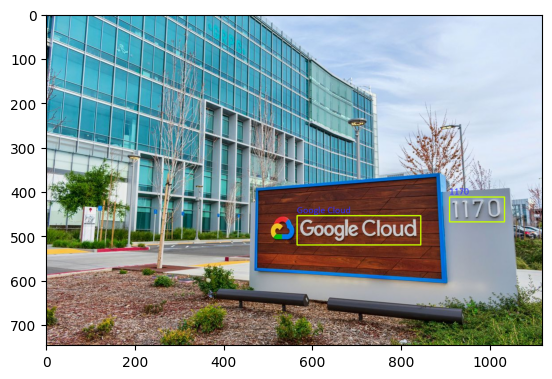

In [16]:
img = google_img.copy()

for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(img, text, lt[0], lt[1], font)
plt.imshow(img)